[![image](https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png)](https://www.visual-layer.com)

# Image Captioning & Visual Question Answering (VQA) With fastdup

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/caption_generation.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/caption_generation.ipynb)


This notebook shows how you can use [fastdup](https://github.com/visual-layer/fastdup) to generate image captions. Caption generation has many useful use cases, including zero-shot classification, and accessibility features.
Additional examples in this notebook include visual question answering (VQA), which can be used for a number of applications such as image retrieval.

The captioning and VQA models employed in this example can generally be run on a CPU, with no GPU needed. The smallest model in this example requires about 0.5s per image caption, allowing 100,000 images to be captioned in half a day.

# Install fastdup

First, install fastdup and verify the installation.

In [1]:
!pip install fastdup -Uq

Now, test the installation. If there's no error message, we are ready to go.

In [1]:
import fastdup
fastdup.__version__

'1.39'

# Load Dataset

In this example we will be using the [COCO Minitrain Dataset](https://github.com/giddyyupp/coco-minitrain), which is a curated mini training set of about 25,000 images (20% of the original COCO dataset).
We will download the dataset into our local drive.

In [ ]:
!pip install gdown

In [2]:
# Download coco minitrain dataset.
!gdown --fuzzy https://drive.google.com/file/d/1iSXVTlkV1_DhdYpVDqsjlT4NJFQ7OkyK/view
!unzip -qq coco_minitrain_25k.zip

# Download csv annotations
!cd coco_minitrain_25k/annotations && gdown --fuzzy https://drive.google.com/file/d/1i12p23cXlqp1QrXjAD_vu467r4q67Mq9/view

Downloading...
From (uriginal): https://drive.google.com/uc?id=1iSXVTlkV1_DhdYpVDqsjlT4NJFQ7OkyK
From (redirected): https://drive.google.com/uc?id=1iSXVTlkV1_DhdYpVDqsjlT4NJFQ7OkyK&confirm=t&uuid=5200f789-4896-43b2-a399-18a9f5584aed
To: /Users/guysinger/Desktop/fastdup/examples/coco_minitrain_25k.zip
100%|██████████████████████████████████████| 4.90G/4.90G [06:45<00:00, 12.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1i12p23cXlqp1QrXjAD_vu467r4q67Mq9
To: /Users/guysinger/Desktop/fastdup/examples/coco_minitrain_25k/annotations/coco_minitrain2017.csv
100%|██████████████████████████████████████| 9.43M/9.43M [00:01<00:00, 8.88MB/s]


### Load Annotations
We will load the annotations into fastdup's annotations format, using a simple converter to translate the COCO annotations into an annotations dataframe (this conversion can be used for any dataset that uses the COCO annotations format).

In [13]:
import pandas as pd

coco_csv = 'coco_minitrain_25k/annotations/coco_minitrain2017.csv'
coco_annotations = pd.read_csv(coco_csv, 
                               header=None, 
                               names=['filename', 'col_x', 'row_y',
                                      'width', 'height', 'label', 'ext'])

coco_annotations['split'] = 'train'  # Only train files were loaded
coco_annotations['filename'] = coco_annotations['filename'].apply(lambda x: 'images/train2017/'+x)
coco_annotations = coco_annotations.drop_duplicates()

In [4]:
coco_annotations.head(5)

,filename,col_x,row_y,width,height,label,ext,split
0,images/train2017/000000131075.jpg,20.23,55.98,313.49,326.50,tv,0,train
1,images/train2017/000000131075.jpg,176.90,381.12,286.20,136.63,laptop,0,train
2,images/train2017/000000131075.jpg,369.96,361.35,72.76,73.91,laptop,0,train
3,images/train2017/000000131075.jpg,411.68,417.87,66.32,129.44,chair,0,train
4,images/train2017/000000131075.jpg,367.31,363.25,72.27,67.01,tv,0,train


# Run fastdup

Run fastdup with annotations on the dataset. Here, we set `num_images` to limit the run to 100 images.

In [14]:
fd = fastdup.create(input_dir='./coco_minitrain_25k')
fd.run(annotations=coco_annotations, ccthreshold=0.9, num_images=1000, overwrite=True)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-09-13 17:33:50 [INFO] Going to loop over dir /var/folders/jx/kcrhkm990p3fnsy7bmv9nh500000gn/T/tmp77bvpl4w.csv
2023-09-13 17:33:50 [INFO] Found total 1000 images to run on, 1000 train, 0 test, name list 1000, counter 1000 
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.tes
2023-09-13 17:33:54 [INFO] Going to loop over dir /var/folders/jx/kcrhkm990p3fnsy7bmv9nh500000gn/T/crops_input.csv
2023-09-13 17:33:54 [INFO] Found total 880 images to run on, 880 train, 0 test, name list 880, counter 880 
2023-09-13 17:33:56 [INFO] Found total 880 images to run onstimated: 0 Minutes
2023-09-13 17:33:56 [INFO] 91) Finished write_index() NN model
2023-09-13 17:33:56 [INFO] Stored nn model index file work_dir/nnf.index
2023-09-13 17:33:56 [INFO] Total time took 2147 ms
2023-09-13 17:33:56 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 % of total graph edges
2023-09-13 17

0

# Generate Captions

fastdup currently supports a number of different captioning and VQA models, each with their own set of advantages and disadvantages. Some of these models are larger and slower, but may produce better results for datasets that are far outside their training distribution. Other models are smaller and faster, but their results may be less useful for images falling far outside their training distribution. Currently, the available models for captioning are:
- ViT-GPT2 : `'vitgpt2'` : a lightweight and fast model trained on COCO images. This model takes about 0.5s per image caption (on a CPU), but may provide less useful results for images that are very different from COCO-like images.
- BLIP-2 : `'blip2'` : a more heavyweight model. This model may provide more robust answers for images different than COCO images, but can take upwards of 10s per image caption.
- BLIP : `'blip'` : a middleweight model that provides a middle-way approach between ViT-GPT2 and BLIP-2.

Available models for VQA are:
- Vilt-b32: `'vqa'` : a fairly lightweight model used for question answering.
- ViT-Age: `'age'` : a lightweight model used to classify the age of humans in a photo.
---> used for person age VQA

By default, the captioning model used will be ViT-GPT2, if not specified otherwise.

In [ ]:
captions_df = fd.caption(model_name='automatic')

In [7]:
captions_sample = captions_df.sample(n=5)
captions_sample.loc[:,['filename', 'caption']].head(5)

,filename,caption
70,coco_minitrain_25k/images/train2017/000000262187.jpg,a red and white plane on a runway
31,coco_minitrain_25k/images/train2017/000000000030.jpg,a white vase with flowers in it
85,coco_minitrain_25k/images/train2017/000000131152.jpg,a man riding a surfboard on top of a wave
45,coco_minitrain_25k/images/train2017/000000131107.jpg,a traffic light with a street light above it
24,coco_minitrain_25k/images/train2017/000000524291.jpg,a dog and a man standing in the grass


# Visualize Images With Captions

Use fastdup's built-in galleries methods to visualize the captioned images.
Additionally, captions can always be generated for a gallery by setting the `label_col` argument to one of the available model names listed above.

In [8]:
captions_to_show = captions_df.sample(20)
visualization_df = pd.DataFrame({'from':captions_to_show['filename'],'to':captions_to_show['filename'], 'label':captions_to_show['caption'], 'distance':0*len(captions_to_show),})
fastdup.create_outliers_gallery(visualization_df, save_path='.', num_images=10)

100%|██████████| 10/10 [00:00<00:00, 19765.81it/s]

Stored outliers visual view in  ./outliers.html


0


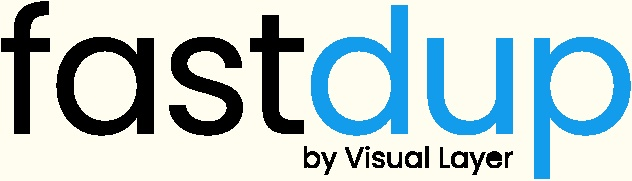
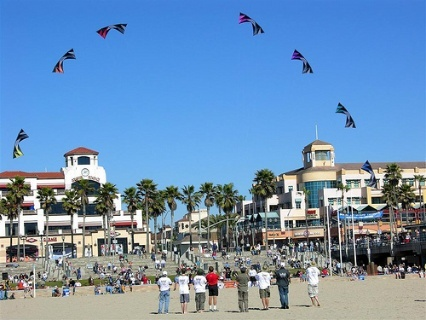
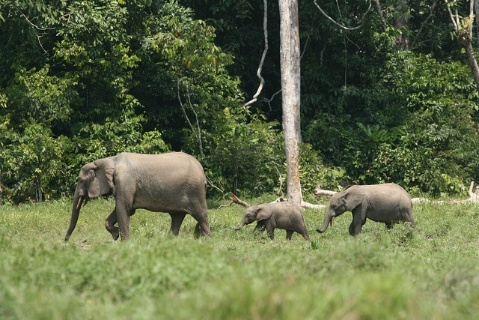
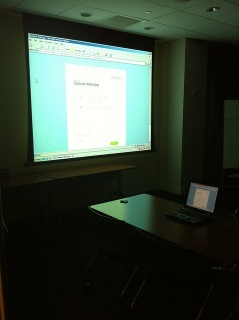
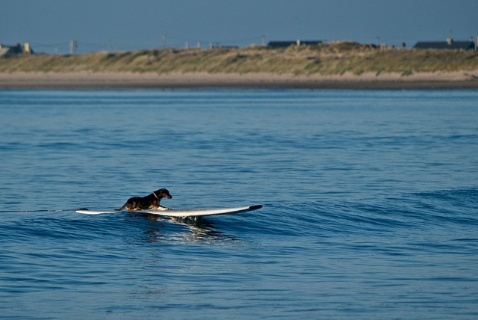
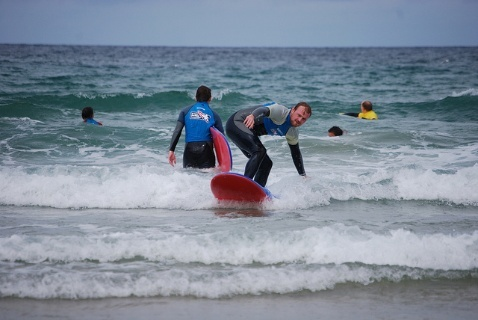
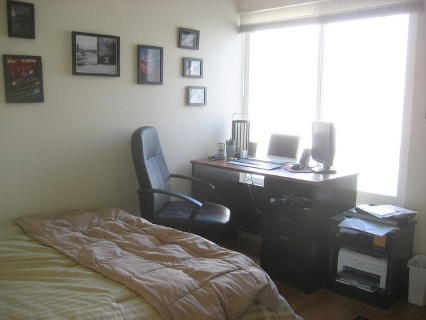
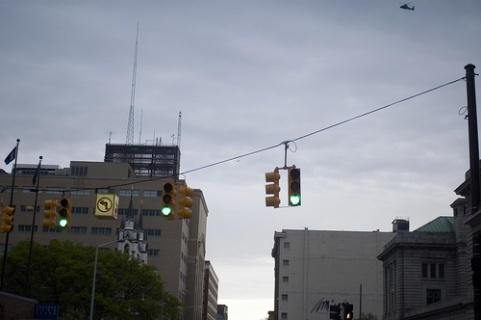
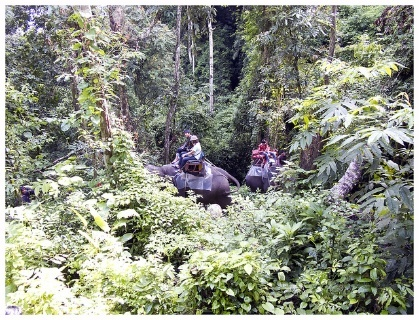
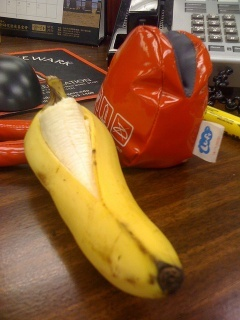
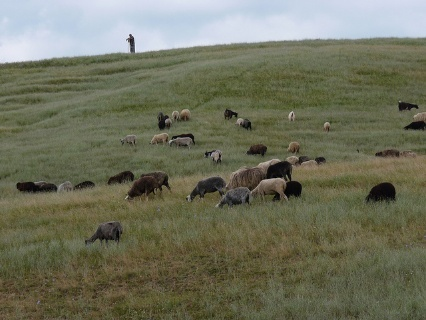

In [10]:
from IPython.display import HTML
HTML('outliers.html')

# Visual Question Answering

Visual question answering in fastdup allows you to use open-ended questions to learn more about the images in your dataset. These can be questions such as "is this photo taken indoors or outdoors?", "is there a dog in the photo?", "is this a photo of an animal or an object?", or any other questions that come to mind. The output from these queries can, in turn, be used for image retrieval, to aid the visually impaired, and many other interesting use cases.

In [ ]:
vqa_df = fd.caption(model_name='vqa', vqa_prompt='is this photo taken indoors or outdoors?')

In [21]:
vqa_sample = vqa_df.sample(n=5)
vqa_sample.loc[:,['filename', 'caption']].head(5)

,filename,caption
876,coco_minitrain_25k/images/train2017/000000524966.jpg,outdoors
171,coco_minitrain_25k/images/train2017/000000524428.jpg,outdoors
449,coco_minitrain_25k/images/train2017/000000262454.jpg,outdoors
538,coco_minitrain_25k/images/train2017/000000524649.jpg,indoors
108,coco_minitrain_25k/images/train2017/000000524375.jpg,outdoors


# Visualize VQA Results

Once again, we will use fastdup's built-in galleries methods to visualize the results of our VQA prompts.

In [17]:
vqa_to_show = vqa_df.sample(20)
vis_vqa_df = pd.DataFrame({'from':vqa_to_show['filename'],'to':vqa_to_show['filename'], 'label':vqa_to_show['caption'], 'distance':0*len(vqa_to_show),})
fastdup.create_outliers_gallery(vis_vqa_df, save_path='.', num_images=10)

100%|██████████| 10/10 [00:00<00:00, 19160.82it/s]

Stored outliers visual view in  ./outliers.html


0


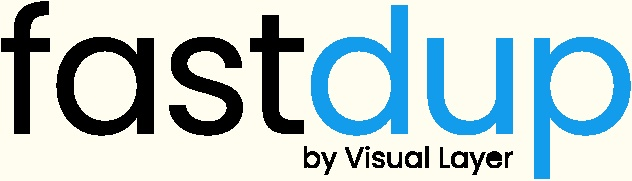
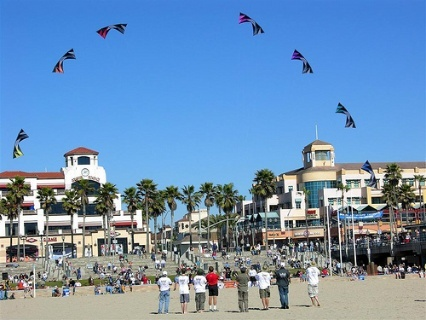
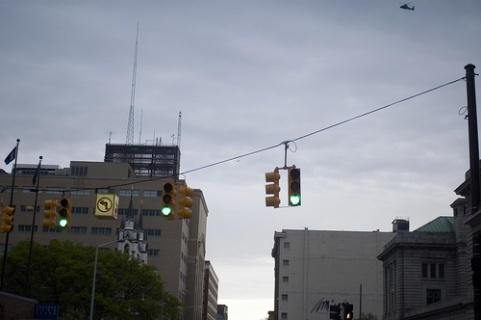
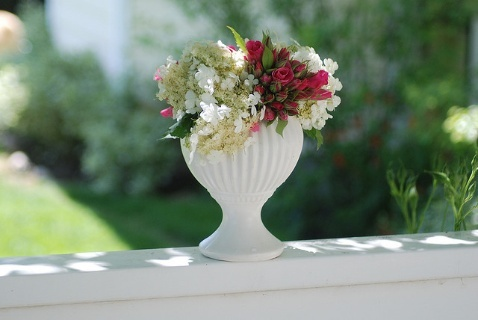
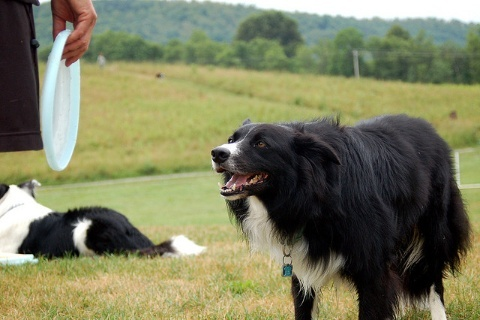
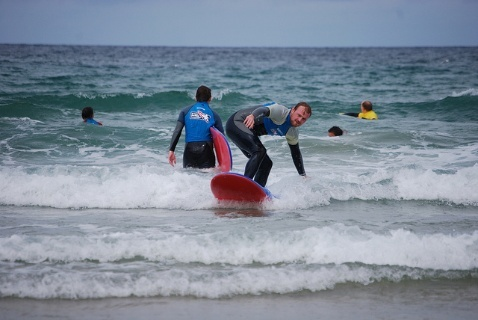
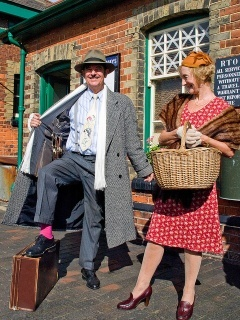
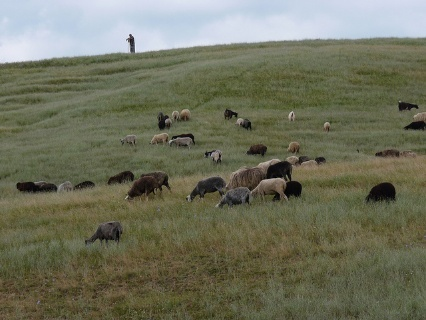
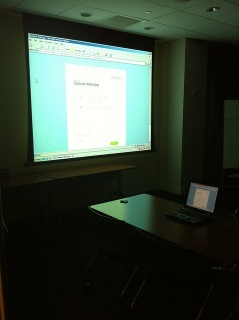
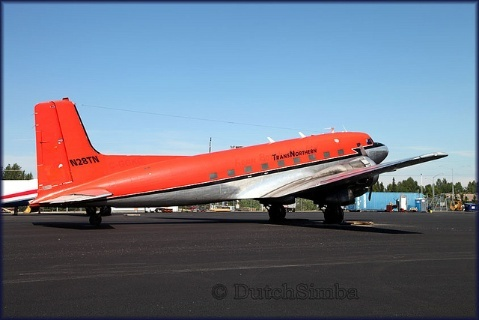
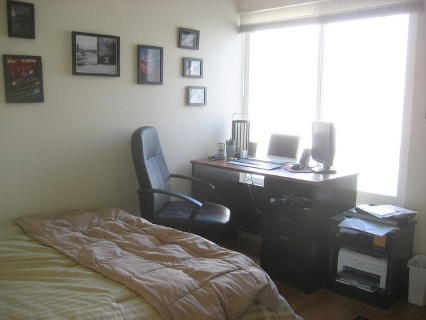

In [18]:
from IPython.display import HTML
HTML('outliers.html')

# Wrap Up

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try. 


## VL Profiler
If you prefer a no-code platform to inspect and visualize your dataset, [**try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser. 

[Sign up](https://app.visual-layer.com) now, it's free.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/vl_profiler_promo.svg)](https://app.visual-layer.com)

As usual, feedback is welcome! 

Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).